# Benchmarking sorting algorithms in Python
INF221 small project, NMBU, Spring 2024

### Importing packages

In [17]:
import numpy as np
import timeit
import copy
import pandas as pd
import matplotlib.pyplot as plt

### Insertion Sort 
by Mohit Kumra\
https://www.geeksforgeeks.org/insertion-sort/


In [18]:
# Function to do insertion sort

def insertionSort(arr):
 
    # Traverse through 1 to len(arr)
    for i in range(1, len(arr)):
 
        key = arr[i]
 
        # Move elements of arr[0..i-1], that are
        # greater than key, to one position ahead
        # of their current position
        j = i-1
        while j >= 0 and key < arr[j] :
                arr[j + 1] = arr[j]
                j -= 1
        arr[j + 1] = key
  
# This code is contributed by Mohit Kumra

### Merge Sort
by Mayank Khanna\
https://www.geeksforgeeks.org/merge-sort/

In [19]:
# Python program for implementation of MergeSort

def mergeSort(arr):
    if len(arr) > 1:
 
         # Finding the mid of the array
        mid = len(arr)//2
 
        # Dividing the array elements
        L = arr[:mid]
 
        # Into 2 halves
        R = arr[mid:]
 
        # Sorting the first half
        mergeSort(L)
 
        # Sorting the second half
        mergeSort(R)
 
        i = j = k = 0
 
        # Copy data to temp arrays L[] and R[]
        while i < len(L) and j < len(R):
            if L[i] <= R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
 
        # Checking if any element was left
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
 
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1
 

# This code is contributed by Mayank Khanna

### Quick Sort
by Adnan Aliakbar\
https://www.geeksforgeeks.org/quick-sort/

In [20]:
# https://www.geeksforgeeks.org/quick-sort/
# Python3 implementation of quickSort
 
# Wrapper over quickSort
def quickSort(arr):
    quicksort(arr, 0, len(arr) - 1)

  
# Function to perform quicksort
def quicksort(array, low, high):
    if low < high:
 
        # Find pivot element such that
        # element smaller than pivot are on the left
        # element greater than pivot are on the right
        pi = partition(array, low, high)
 
        # Recursive call on the left of pivot
        quicksort(array, low, pi - 1)
 
        # Recursive call on the right of pivot
        quicksort(array, pi + 1, high)

# Function to find the partition position
def partition(array, low, high):
 
    # Choose the rightmost element as pivot
    pivot = array[high]
 
    # Pointer for greater element
    i = low - 1
 
    # Traverse through all elements
    # compare each element with pivot
    for j in range(low, high):
        if array[j] <= pivot:
 
            # If element smaller than pivot is found
            # swap it with the greater element pointed by i
            i = i + 1
 
            # Swapping element at i with element at j
            (array[i], array[j]) = (array[j], array[i])
 
    # Swap the pivot element with
    # the greater element specified by i
    (array[i + 1], array[high]) = (array[high], array[i + 1])
 
    # Return the position from where partition is done
    return i + 1 
 
# This code is contributed by Adnan Aliakbar

### Generate Data

In [21]:
def generate_data(size, algorithm, case):
    rng = np.random.default_rng(12235)
    
    # Average case
    if case == 'average':
        return rng.uniform(size=size)  # Random elements for the average case
    
    # Best case
    elif case == 'best':
        if algorithm == 'InsertionSort':
            return np.arange(size)  # Sorted in ascending order for best case
        elif algorithm == 'MergeSort':
            return rng.uniform(size=size)  # MergeSort's performance is the same for all cases
        elif algorithm == 'QuickSort':
            return np.arange(size, 0, -1)  # Sorted in reverse order for best case
       
    # Worst case    
    elif case == 'worst':
        if algorithm == 'InsertionSort':
            return np.arange(size, 0, -1)  # Sorted in descending for worst case
        elif algorithm == 'QuickSort':
            return np.arange(size) # Sorted in ascending order for worst case
        elif algorithm == 'MergeSort':
            return rng.uniform(size=size)  # MergeSort's performance is the same for all cases

### Benchmarking

In [22]:
def benchmarking(algorithms, sizes, repetitions, case):
    results = []

    for name in algorithms:
        func = algorithms[name]
        for size in sizes:
            test_data = generate_data(size, name, case)
            clock = timeit.Timer(stmt='sort_func(copy(data))',
                                 globals={'sort_func': func, 
                                          'data': test_data, 
                                          'copy': copy.copy})
            nE, n_ar = clock.autorange()
            times = clock.repeat(repeat=repetitions, number=nE)
            
            for time in times:
                results.append({
                    'Algorithm': name,
                    'Size': size,
                    'Case': case,
                    'Time': time / nE,
                    'Executions': nE
                })

    df = pd.DataFrame(results)
    return df

In [23]:
# Example usage
algorithms = {
    'InsertionSort': insertionSort,
    'MergeSort': mergeSort,
    'QuickSort': quickSort
}

sizes = [100 * pow(2, i) for i in range(5)] 
repetitions = 7


cases = ['best', 'worst', 'average']

for case in cases:
    df = benchmarking(algorithms, sizes, repetitions, case)

    print(df)
    # Save to pickle
    df.to_pickle(f"benchmark_results_{case}_case.pkl")



         Algorithm  Size  Case      Time  Executions
0    InsertionSort   100  best  0.000020       20000
1    InsertionSort   100  best  0.000020       20000
2    InsertionSort   100  best  0.000020       20000
3    InsertionSort   100  best  0.000020       20000
4    InsertionSort   100  best  0.000020       20000
..             ...   ...   ...       ...         ...
100      QuickSort  1600  best  0.228479           1
101      QuickSort  1600  best  0.222618           1
102      QuickSort  1600  best  0.226740           1
103      QuickSort  1600  best  0.222391           1
104      QuickSort  1600  best  0.223721           1

[105 rows x 5 columns]
         Algorithm  Size   Case      Time  Executions
0    InsertionSort   100  worst  0.000949         500
1    InsertionSort   100  worst  0.000922         500
2    InsertionSort   100  worst  0.000938         500
3    InsertionSort   100  worst  0.000922         500
4    InsertionSort   100  worst  0.000918         500
..             .

### Plotting Benchmarking Data

In [40]:
# Load the DataFrame
def mean_sorts(df):
    # Group by 'Algorithm', 'Size', and 'Case' and calculate the mean of 'Time'
    means = df.groupby(['Algorithm', 'Size', 'Case']).mean()['Time'].round(5)
    # Reset index to convert indices into columns
    means = means.reset_index()
    # Pivot the DataFrame to make 'Size' the index, columns to be the algorithms, and values to be 'Time', separated by 'Case'
    means = means.pivot_table(index='Size', columns=['Algorithm', 'Case'], values='Time')
    return means

df_best = pd.read_pickle("benchmark_results_best_case.pkl")
df_means_best = mean_sorts(df_best)
print(df_means_best)
print()

df_average = pd.read_pickle("benchmark_results_average_case.pkl")
df_means_average = mean_sorts(df_average)
print(df_means_average)
print()

df_worst = pd.read_pickle("benchmark_results_worst_case.pkl")
df_means_worst = mean_sorts(df_worst)
print(df_means_worst)

# Blue: insertion sort
# Orange: merge sort
# Green: quick sort
def plot_figure(df_means):
    plt.figure(figsize=(84/25.4, 55/25.4))  # Convert mm to inches
    df_means = df_means.sort_index()
    ax = df_means.plot(kind='line', lw=4, marker='o', markersize=5, legend=False)
    ax.set_ylabel("Running Time [ms]", fontsize=18)
    ax.set_xlabel("Input Size", fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=14)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Algorithm InsertionSort MergeSort QuickSort
Case               best      best      best
Size                                       
100             0.00002   0.00019   0.00088
200             0.00004   0.00042   0.00346
400             0.00008   0.00093   0.01398
800             0.00017   0.00199   0.05665
1600            0.00037   0.00430   0.22647

Algorithm InsertionSort MergeSort QuickSort
Case            average   average   average
Size                                       
100             0.00051   0.00019   0.00013
200             0.00193   0.00041   0.00034
400             0.00727   0.00090   0.00082
800             0.03096   0.00199   0.00159
1600            0.12635   0.00436   0.00371

Algorithm InsertionSort MergeSort QuickSort
Case              worst     worst     worst
Size                                       
100             0.00093   0.00019   0.00131
200             0.00368   0.00041   0.00525
400             0.01509   0.00090   0.02041
800             0.06167   0.00

In [ ]:
df_best = pd.read_pickle("benchmark_results_best_case.pkl")
df_means_best = mean_sorts(df_best)

### Worst Case, Benchmarking

<Figure size 330.709x216.535 with 0 Axes>

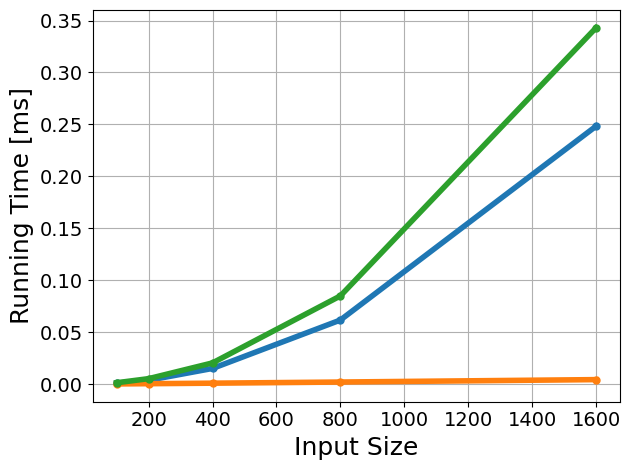

In [29]:
df_worst = pd.read_pickle("benchmark_results_worst_case.pkl")
df_means_worst = mean_sorts(df_worst)
plot_figure(df_means_worst)

### Average Case, Benchmarking

<Figure size 330.709x216.535 with 0 Axes>

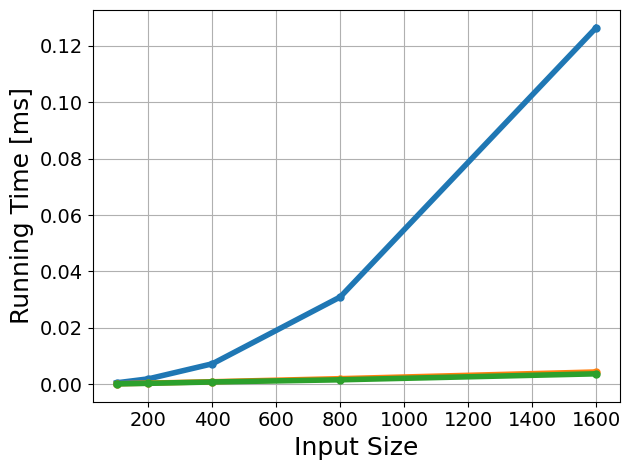

In [31]:
df_average = pd.read_pickle("benchmark_results_average_case.pkl")
df_means_average = mean_sorts(df_average)
plot_figure(df_means_average)


### Best Case, Benchmarking

<Figure size 330.709x216.535 with 0 Axes>

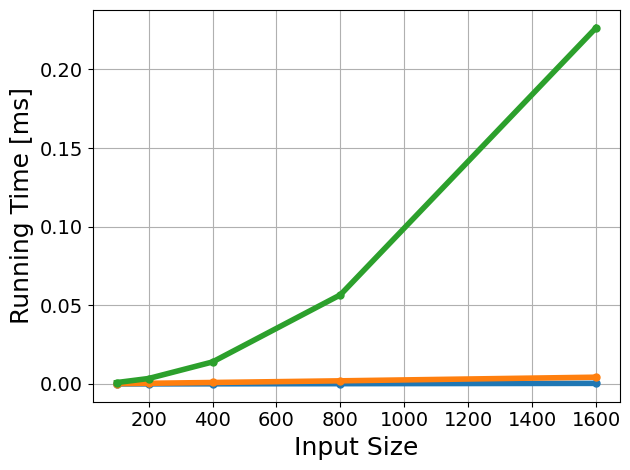

In [33]:
df_best = pd.read_pickle("benchmark_results_best_case.pkl")
df_means_best = mean_sorts(df_best)
plot_figure(df_means_best)